## Practical Work 2

For this practical work, the trainees will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>

In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
X.shape

(50,)

In [4]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

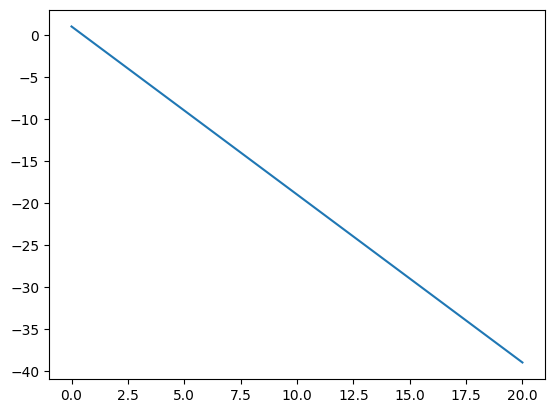

In [5]:
plt.plot(X,y)

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check)."
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check. However, the used values in the current implementation used 0.001 for both.

In [221]:
def linear_regression(X , y , alpha , iterations):
    m = len(y)
    lr = alpha
    x_b = np.c_[np.ones((len(X),1)) , X]
    theta = np.zeros((x_b.shape[1] , 1))
    y = y.reshape(-1,1)
    total_cost = []
    theta_history = []
    for i in range(iterations):
        y_pred = x_b.dot(theta)
        assert y_pred.shape == y.shape , "shape of y_pred and y are not the same"

        error = y_pred - y
        cost = (1/(2*m)) * np.sum(error**2)
        gradients = (1/m) * x_b.T.dot(error)

        if np.linalg.norm(gradients) < 1e-3:
            break
        
        theta = theta - lr * gradients
        total_cost.append(cost)
        theta_history.append(theta.copy())
        print(f"Iteration {i+1} : Cost {cost} , Norm of Gradient {np.linalg.norm(gradients)}")
    return theta , y_pred , total_cost , theta_history


#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [222]:
theta , y_pred , total_cost , theta_history= linear_regression(X , y , 0.0005 , 300)
theta , y_pred

Iteration 1 : Cost 249.88775510204087 , Norm of Gradient 260.08269357432516
Iteration 2 : Cost 217.2114267068664 , Norm of Gradient 242.47021371610177
Iteration 3 : Cost 188.810851451214 , Norm of Gradient 226.05043256242345
Iteration 4 : Cost 164.12653903114239 , Norm of Gradient 210.7425820402665
Iteration 5 : Cost 142.67220949672134 , Norm of Gradient 196.4713636070801
Iteration 6 : Cost 124.02521354011061 , Norm of Gradient 183.16657786106376
Iteration 7 : Cost 107.81820630688333 , Norm of Gradient 170.76277923385967
Iteration 8 : Cost 93.73191070472953 , Norm of Gradient 159.19895406711123
Iteration 9 : Cost 81.48882764676844 , Norm of Gradient 148.41822048936183
Iteration 10 : Cost 70.8477693213015 , Norm of Gradient 138.36754861700467
Iteration 11 : Cost 61.59910779345566 , Norm of Gradient 128.99749970296529
Iteration 12 : Cost 53.56064533619978 , Norm of Gradient 120.26198295000297
Iteration 13 : Cost 46.57402513628042 , Norm of Gradient 112.11802879240724
Iteration 14 : Cost 

(array([[-0.09937906],
        [-1.91822391]]),
 array([[ -0.09951988],
        [ -0.88246414],
        [ -1.6654084 ],
        [ -2.44835266],
        [ -3.23129692],
        [ -4.01424118],
        [ -4.79718544],
        [ -5.5801297 ],
        [ -6.36307396],
        [ -7.14601822],
        [ -7.92896248],
        [ -8.71190673],
        [ -9.49485099],
        [-10.27779525],
        [-11.06073951],
        [-11.84368377],
        [-12.62662803],
        [-13.40957229],
        [-14.19251655],
        [-14.97546081],
        [-15.75840507],
        [-16.54134933],
        [-17.32429359],
        [-18.10723784],
        [-18.8901821 ],
        [-19.67312636],
        [-20.45607062],
        [-21.23901488],
        [-22.02195914],
        [-22.8049034 ],
        [-23.58784766],
        [-24.37079192],
        [-25.15373618],
        [-25.93668044],
        [-26.7196247 ],
        [-27.50256895],
        [-28.28551321],
        [-29.06845747],
        [-29.85140173],
        [-30.634

#### Calculate r2 score

In [223]:
#import r2 score from sklearn.metrics
from sklearn.metrics import r2_score
print(f"R2 Score : {r2_score(y , y_pred)}")

R2 Score : 0.9977561032305051


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

#### Plot loss vs. epochs

In [224]:
def loss_vs_epochs(total_cost):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(total_cost)), total_cost , "-o" , linestyle='-' , markersize = 8)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss vs Epochs")
    plt.show()

C:\Users\basil\AppData\Local\Temp\ipykernel_8232\1038961213.py:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(range(len(total_cost)), total_cost , "-o" , linestyle='-' , markersize = 8)


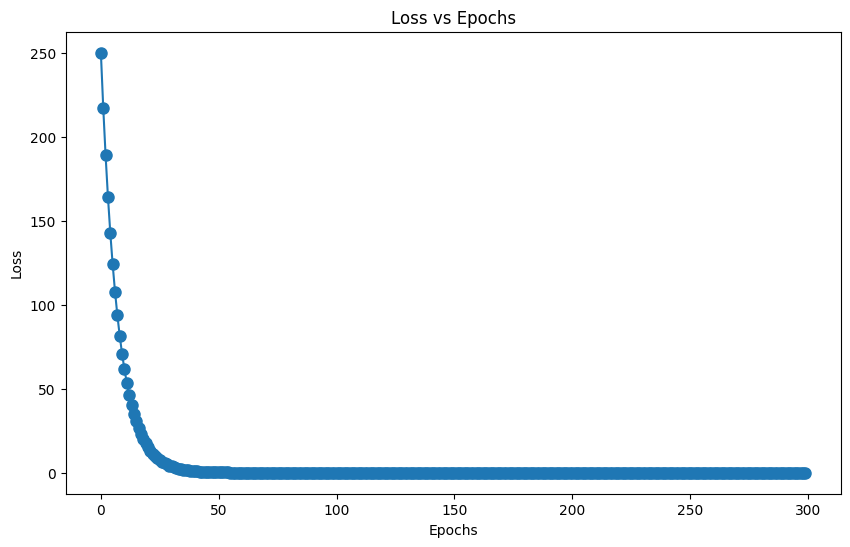

In [225]:
loss_vs_epochs(total_cost)

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

In [226]:
def theta_vs_loss(theta , total_cost):
    theta_array = np.array(theta).reshape(-1,2)
    plt.plot(theta_array[: , 0] , total_cost , label = "theta 0")
    plt.plot(theta_array[: , 1] , total_cost , label = "theta 1")
    plt.xlabel("Theta")
    plt.ylabel("Loss")
    plt.title("learning rate = 0.0005")
    plt.legend()
    plt.show()

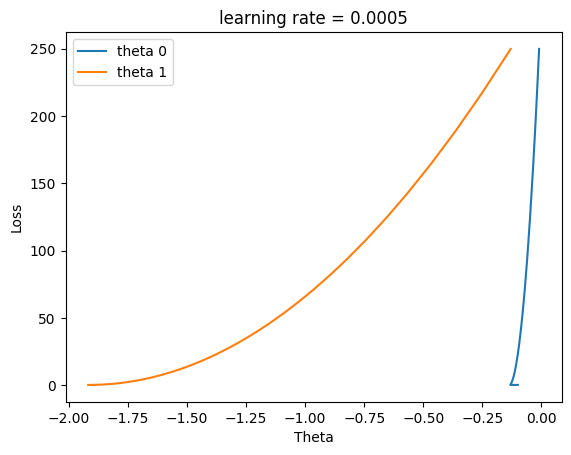

In [227]:
theta_vs_loss(theta_history , total_cost)

#### Plot all regression lines till converge

In [228]:
def plot_regression_lines(X, y , theta_history):
    for i in range(len(theta_history)):
        curr_theta = theta_history[i]
        y_pred = curr_theta[0] + curr_theta[1]*X
        plt.plot(X, y_pred, color='red', alpha=0.2)
    plt.scatter(X, y, color='blue')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Regression Lines over Iterations")
    plt.show()


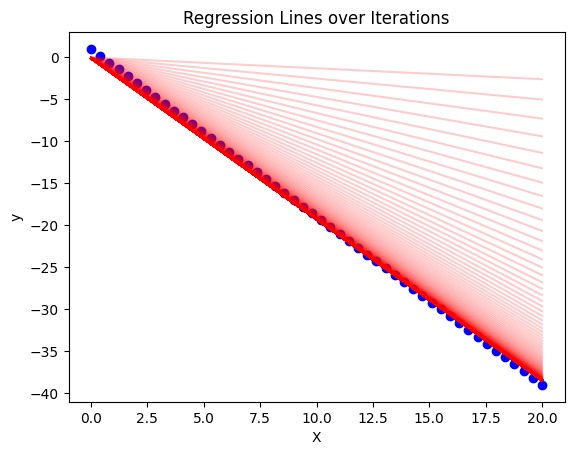

In [229]:
plot_regression_lines(X, y , theta_history)

#### Plot the best regression line

In [230]:
def best_regression_line(X , y , y_pred):
    plt.scatter(X, y, color='blue', label='Actual Data')
    plt.plot(X , y_pred , color='red', label='Best Fit Line')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Best Regression Line")
    plt.legend()
    plt.show()

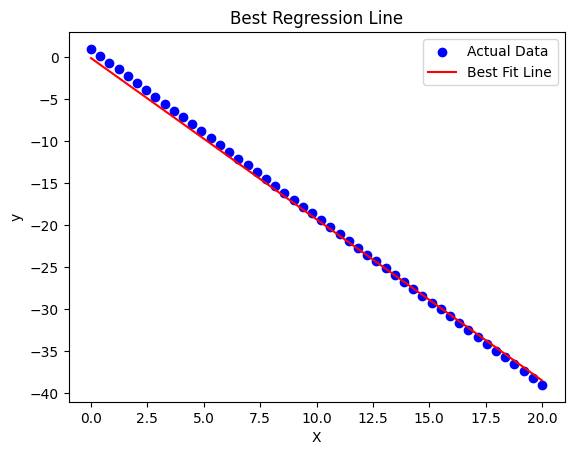

In [231]:
best_regression_line(X, y , y_pred)

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

In [232]:
theta , y_pred , total_cost , theta_history = linear_regression(X , y , 0.00005 , 1000)

Iteration 1 : Cost 249.88775510204087 , Norm of Gradient 260.08269357432516
Iteration 2 : Cost 246.51705648072962 , Norm of Gradient 258.3214455149881
Iteration 3 : Cost 243.19185519883976 , Norm of Gradient 256.57212444166527
Iteration 4 : Cost 239.91153713723412 , Norm of Gradient 254.83464958627263
Iteration 5 : Cost 236.67549646610237 , Norm of Gradient 253.10894072767942
Iteration 6 : Cost 233.48313553307253 , Norm of Gradient 251.39491818800363
Iteration 7 : Cost 230.3338647528323 , Norm of Gradient 249.6925028289336
Iteration 8 : Cost 227.22710249824078 , Norm of Gradient 248.0016160480742
Iteration 9 : Cost 224.1622749929098 , Norm of Gradient 246.32217977531687
Iteration 10 : Cost 221.13881620523506 , Norm of Gradient 244.65411646923639
Iteration 11 : Cost 218.1561677438577 , Norm of Gradient 242.99734911350959
Iteration 12 : Cost 215.21377875453695 , Norm of Gradient 241.3518012133597
Iteration 13 : Cost 212.31110581841477 , Norm of Gradient 239.71739679202463
Iteration 14 : 

C:\Users\basil\AppData\Local\Temp\ipykernel_8232\1038961213.py:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(range(len(total_cost)), total_cost , "-o" , linestyle='-' , markersize = 8)


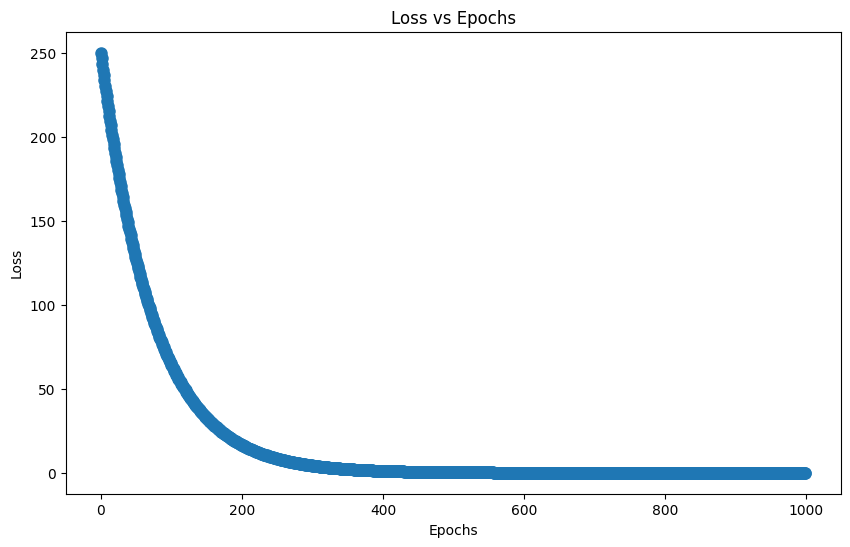

In [233]:
loss_vs_epochs(total_cost)

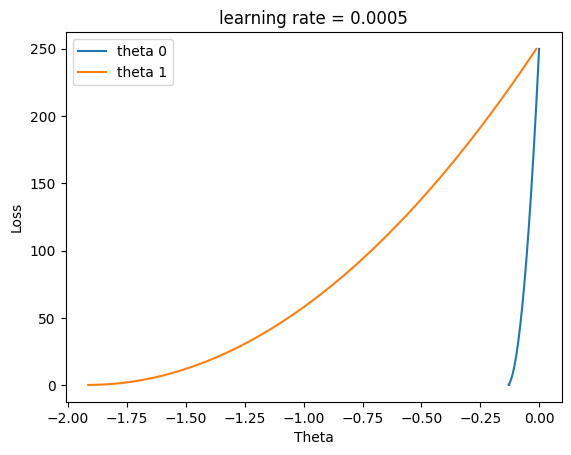

In [234]:
theta_vs_loss(theta_history , total_cost)

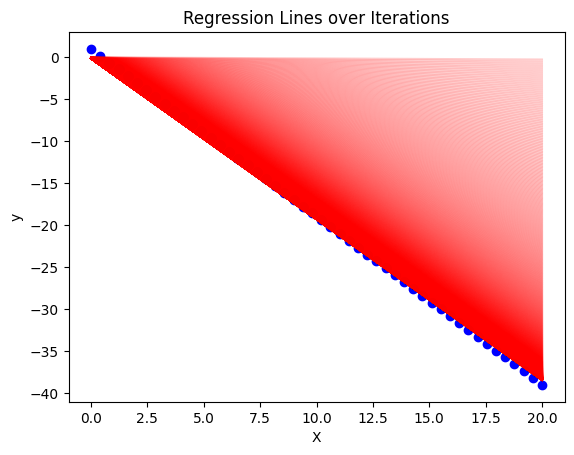

In [235]:
plot_regression_lines(X , y , theta_history=theta_history)

In [236]:
r2 = r2_score(y , y_pred)
r2

0.9976341091713091

##### The following results uses alpha = 0.005 and max. iterations = 300.

In [237]:
theta , y_pred , total_cost , theta_history = linear_regression(X , y , 0.005 , 300)

Iteration 1 : Cost 249.88775510204087 , Norm of Gradient 260.08269357432516
Iteration 2 : Cost 26.19025294403267 , Norm of Gradient 83.95812118156734
Iteration 3 : Cost 2.878975652984499 , Norm of Gradient 27.104055584992103
Iteration 4 : Cost 0.4493890625258197 , Norm of Gradient 8.753870925814992
Iteration 5 : Cost 0.1958262128637633 , Norm of Gradient 2.8393237932310105
Iteration 6 : Cost 0.16902170833832983 , Norm of Gradient 0.9572002734656334
Iteration 7 : Cost 0.1658480350862043 , Norm of Gradient 0.4140313779368469
Iteration 8 : Cost 0.1651378388088851 , Norm of Gradient 0.3059623418473793
Iteration 9 : Cost 0.16468532604680708 , Norm of Gradient 0.29208008531422736
Iteration 10 : Cost 0.1642606347275193 , Norm of Gradient 0.2902623109709068
Iteration 11 : Cost 0.16383980908490806 , Norm of Gradient 0.2897394929770292
Iteration 12 : Cost 0.16342035028122168 , Norm of Gradient 0.2893526279514518
Iteration 13 : Cost 0.16300199545171523 , Norm of Gradient 0.2889803784918452
Iterat

C:\Users\basil\AppData\Local\Temp\ipykernel_8232\1038961213.py:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(range(len(total_cost)), total_cost , "-o" , linestyle='-' , markersize = 8)


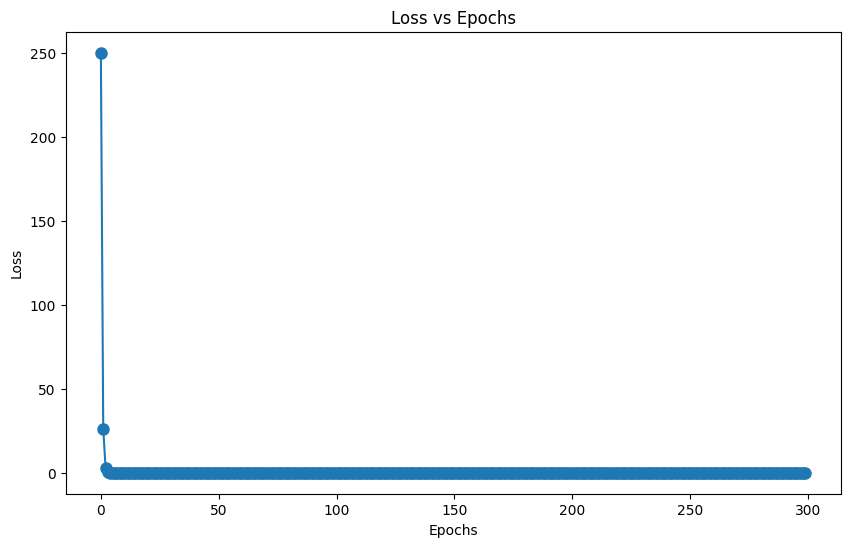

In [238]:
loss_vs_epochs(total_cost)

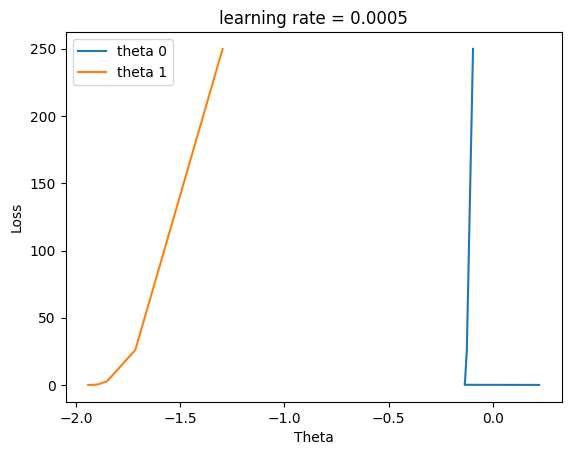

In [239]:
theta_vs_loss(theta_history , total_cost)

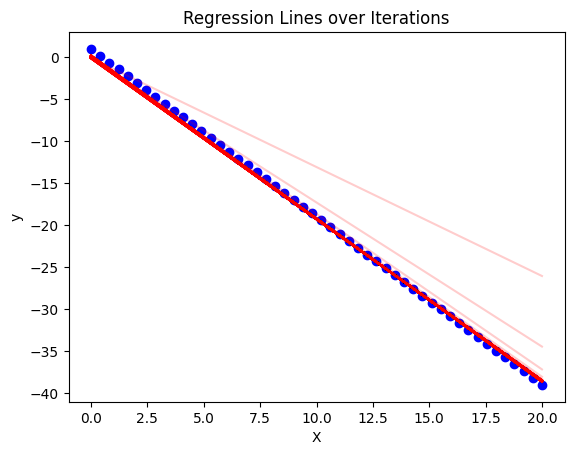

In [240]:
plot_regression_lines(X , y , theta_history=theta_history)

In [241]:
r2 = r2_score(y , y_pred)
r2

0.998874307514268

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>
- <font color='red'><b>To obtain the same results use np.random.seed(101) before shuffle</b></font>

In [242]:
def St_GD_LR_1var(X , y , lr , epochs):
    m = len(y)
    x_b = np.c_[np.ones((len(X),1)) , X]
    theta = np.zeros((x_b.shape[1] , 1))
    y = y.reshape(-1,1)
    total_cost = []
    theta_history_0 = []
    theta_history_1 = []
    iteration_losses = []
    np.random.seed(101)

    for epoch in range(epochs):
        indices = np.random.permutation(m)
        x_shuffled = x_b[indices]
        y_shuffled = y[indices]

        for i in range(m):
            xi = x_shuffled[i:i+1]
            yi = y_shuffled[i:i+1]
            y_pred = xi.dot(theta)
            assert y_pred.shape == yi.shape , "shape of y_pred and yi are not the same"
            
            error = y_pred - yi
            losses = (1/2) * np.sum(error**2)
            iteration_losses.append(losses)

            gradients = xi.T.dot(error)
            theta = theta - lr * gradients
            theta_history_0.append(theta[0][0])
            theta_history_1.append(theta[1][0])

        y_pred_epoch = x_b.dot(theta)
        error_epoch = y_pred_epoch - y
        cost = (1/(2*m)) * np.sum(error_epoch**2)
        total_cost.append(cost)
        print(f"Epoch {epoch+1}\nCost {cost}\ngradient Norm {np.linalg.norm(gradients)}\ngradients:\n{gradients}\nTheta:\n{theta}\n")

        if epoch > 0:
            previous_cost = total_cost[-2]
            if abs(previous_cost - cost) < 1e-3:
                print(f"Converged at epoch {epoch+1}")
                break
    return theta_history_0 , theta_history_1 , total_cost , theta[0] , theta[1] , iteration_losses

##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [243]:
all_theta_0_St , all_theta_1_St , loss_St , opt_theta_0_St , opt_theta_1_St , iteration_losses = St_GD_LR_1var(X,y,0.0005,300)

Epoch 1
Cost 0.38255867873898375
gradient Norm 9.012571185993627
gradients:
[[0.71006972]
 [8.98455566]]
Theta:
[[-0.12761222]
 [-1.85928418]]

Epoch 2
Cost 0.16756655239071447
gradient Norm 9.128975008839141
gradients:
[[0.53161982]
 [9.1134826 ]]
Theta:
[[-0.12373312]
 [-1.90800999]]

Epoch 3
Cost 0.16072552238978985
gradient Norm 2.336545453333877
gradients:
[[0.15437912]
 [2.33143984]]
Theta:
[[-0.11713142]
 [-1.91697621]]

Epoch 4
Cost 0.1614568897844929
gradient Norm 3.002307680979925
gradients:
[[-0.78859754]
 [-2.89688891]]
Theta:
[[-0.10958515]
 [-1.91106426]]

Converged at epoch 4


In [244]:
r2 = r2_score(y , opt_theta_0_St + opt_theta_1_St * X)
r2

0.9976731212942823

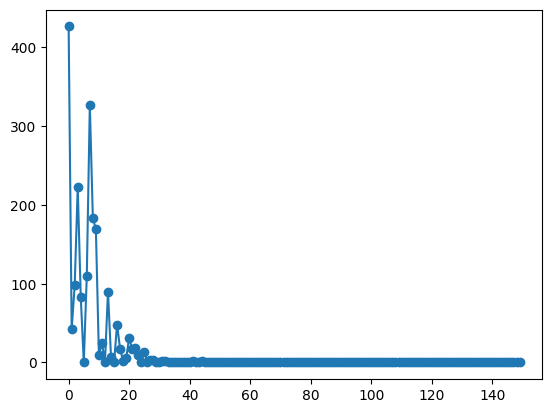

In [245]:
plt.plot(iteration_losses[:150] , marker = "o")
plt.show()

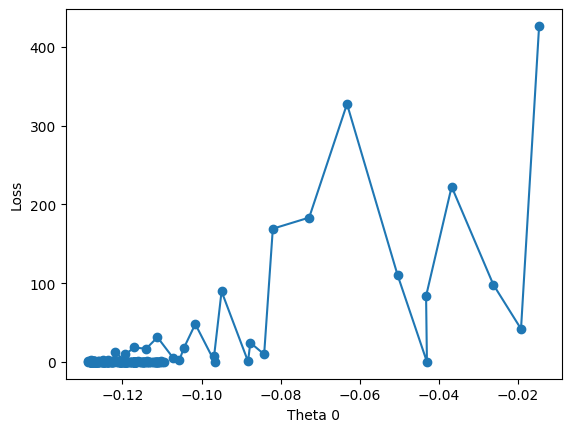

In [246]:
plt.plot(all_theta_0_St , iteration_losses, marker = "o" , linestyle='-')
plt.xlabel("Theta 0")
plt.ylabel("Loss")
plt.show()

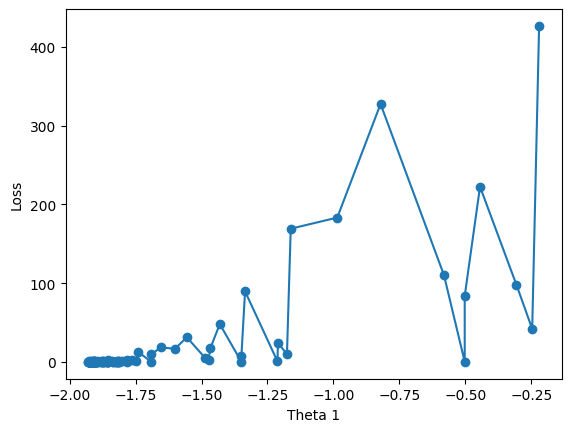

In [247]:
plt.plot(all_theta_1_St , iteration_losses, marker = "o" , linestyle='-')
plt.xlabel("Theta 1")
plt.ylabel("Loss")
plt.show()

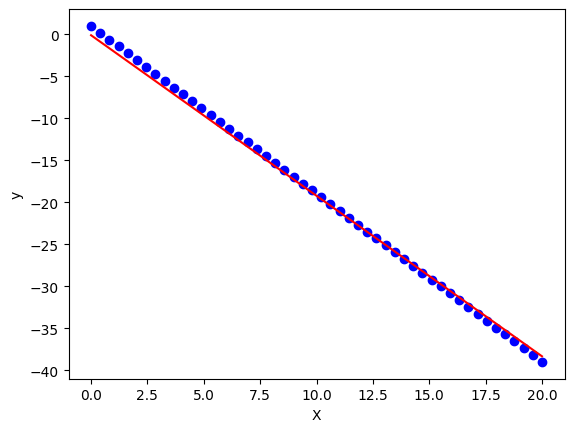

In [248]:
plt.scatter(X, y, color='blue')
plt.plot(X , opt_theta_0_St + opt_theta_1_St*X , color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

##### The following results uses alpha = 0.0001 and max. iterations = 300.

In [249]:
all_theta_0_St , all_theta_1_St , loss_St , opt_theta_0_St , opt_theta_1_St , iteration_losses = St_GD_LR_1var(X,y,0.0001,300)

Epoch 1
Cost 63.592727995382354
gradient Norm 157.59525139074904
gradients:
[[ 12.41639194]
 [157.10536742]]
Theta:
[[-0.06840945]
 [-0.95007436]]

Epoch 2
Cost 16.310325677973363
gradient Norm 153.87074316343407
gradients:
[[  8.9605609 ]
 [153.60961542]]
Theta:
[[-0.10182379]
 [-1.42844079]]

Epoch 3
Cost 4.256918347023669
gradient Norm 59.789458333100086
gradients:
[[ 3.95038078]
 [59.65881175]]
Theta:
[[-0.11838473]
 [-1.67035757]]

Epoch 4
Cost 1.2183819797660222
gradient Norm 1.368255941978319
gradients:
[[-0.3593913 ]
 [-1.32021294]]
Theta:
[[-0.12569037]
 [-1.79125456]]

Epoch 5
Cost 0.430615712575195
gradient Norm 11.656779773025262
gradients:
[[ 0.86305231]
 [11.62478625]]
Theta:
[[-0.12883729]
 [-1.85328617]]

Epoch 6
Cost 0.2320623476212971
gradient Norm 2.091708579873013
gradients:
[[-0.28210361]
 [-2.07259797]]
Theta:
[[-0.12969181]
 [-1.88442273]]

Epoch 7
Cost 0.18147586103241356
gradient Norm 1.175979133174627
gradients:
[[-1.08877751]
 [-0.44439898]]
Theta:
[[-0.12939

In [250]:
r2 = r2_score(y , opt_theta_0_St + opt_theta_1_St * X)
r2

0.9976421168689298

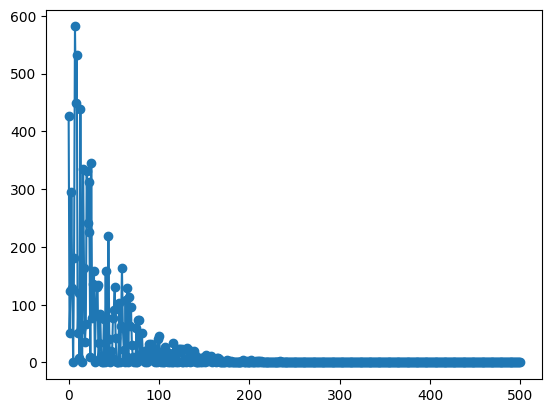

In [251]:
plt.plot(iteration_losses[:500] , marker = "o")

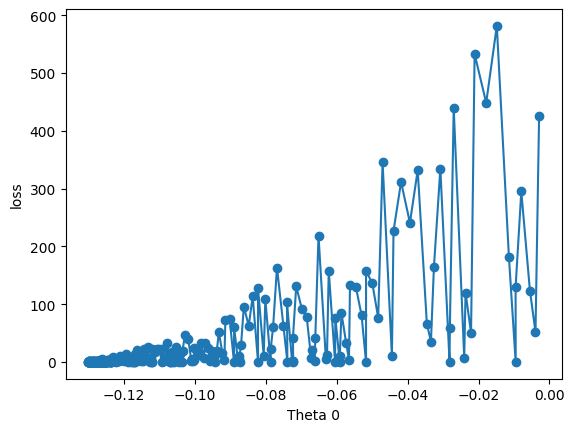

In [252]:
plt.plot(all_theta_0_St , iteration_losses , marker = "o" , linestyle='-')
plt.xlabel("Theta 0")
plt.ylabel("loss")
plt.show()

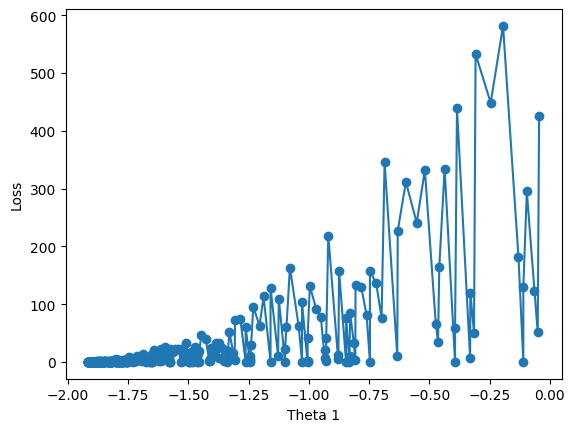

In [253]:
plt.plot(all_theta_1_St , iteration_losses, marker = "o" , linestyle='-')
plt.xlabel("Theta 1")
plt.ylabel("Loss")
plt.show()

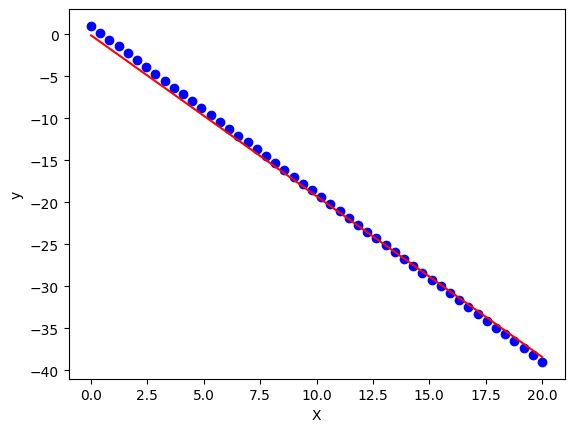

In [254]:
plt.scatter(X , y , color = "blue")
plt.plot(X , opt_theta_0_St + opt_theta_1_St*X , color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

##### The following results uses alpha = 0.00007 and max. iterations = 300.

In [255]:
all_theta_0_St , all_theta_1_St , loss_St , opt_theta_0_St , opt_theta_1_St , iteration_losses = St_GD_LR_1var(X,y,0.00007,300)

Epoch 1
Cost 96.17028518683242
gradient Norm 193.13902845642275
gradients:
[[ 15.21676482]
 [192.53865685]]
Theta:
[[-0.0526626]
 [-0.7277523]]

Epoch 2
Cost 37.100004781568465
gradient Norm 227.82628335641914
gradients:
[[ 13.26731284]
 [227.43964869]]
Theta:
[[-0.08471305]
 [-1.17877344]]

Epoch 3
Cost 14.353792740328505
gradient Norm 108.71308091364081
gradients:
[[  7.1828392]
 [108.4755308]]
Theta:
[[-0.10454386]
 [-1.45886743]]

Epoch 4
Cost 5.636432127807893
gradient Norm 0.8983562659381031
gradients:
[[0.23596567]
 [0.86681266]]
Theta:
[[-0.11617074]
 [-1.6319836 ]]

Epoch 5
Cost 2.265583845833007
gradient Norm 32.56443984735283
gradients:
[[ 2.41102737]
 [32.47506258]]
Theta:
[[-0.12316938]
 [-1.73989845]]

Epoch 6
Cost 0.9721180318710836
gradient Norm 2.1783827245893974
gradients:
[[0.29379314]
 [2.15848023]]
Theta:
[[-0.12711612]
 [-1.80675235]]

Epoch 7
Cost 0.4751740831917671
gradient Norm 1.1527841925336422
gradients:
[[-1.06730253]
 [-0.43563369]]
Theta:
[[-0.12916783]
 

In [256]:
r2 = r2_score(y , opt_theta_0_St + opt_theta_1_St*X)
r2

0.997637934381841

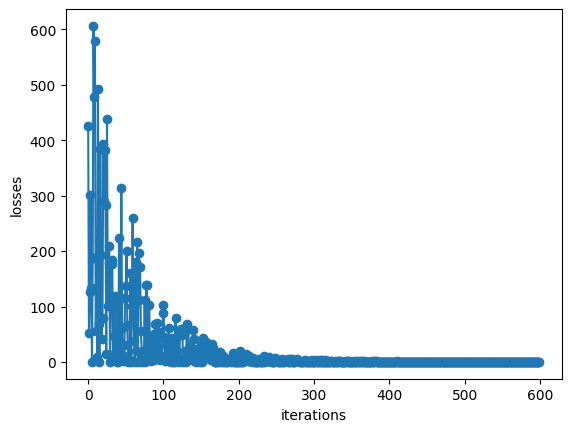

In [257]:
plt.plot(iteration_losses[:600] , marker = "o")
plt.xlabel("iterations")
plt.ylabel("losses")
plt.show()

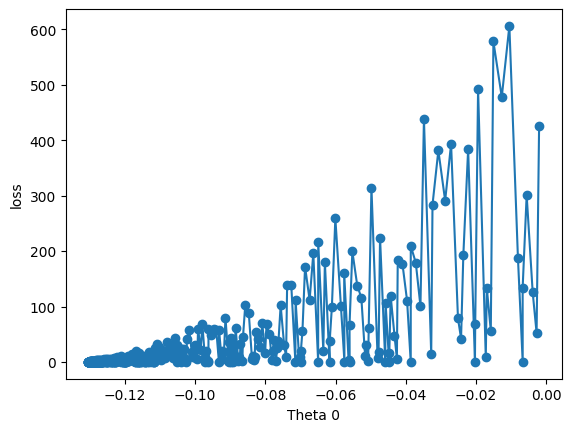

In [258]:
plt.plot(all_theta_0_St , iteration_losses, marker = "o" , linestyle='-')
plt.xlabel("Theta 0")
plt.ylabel("loss")
plt.show()

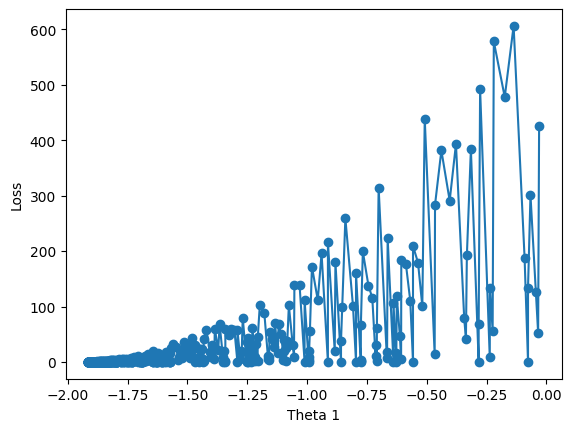

In [259]:
plt.plot(all_theta_1_St , iteration_losses , marker = "o" , linestyle='-')
plt.xlabel("Theta 1")
plt.ylabel("Loss")
plt.show()

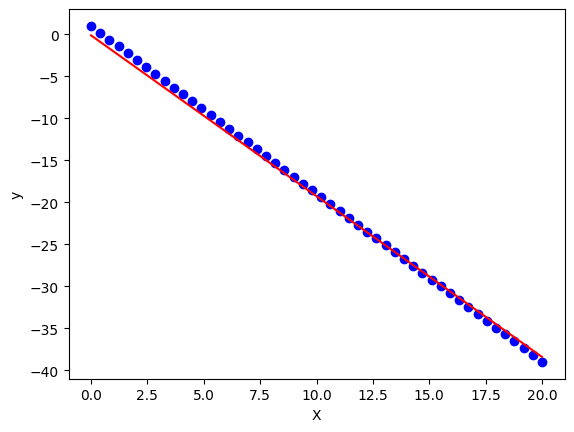

In [260]:
plt.scatter(X , y , color="blue")
plt.plot(X , opt_theta_0_St + opt_theta_1_St*X , color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>
- <font color='red'><b>To obtain the same results use np.random.seed(101) before shuffle</b></font>

In [261]:
def mini_batch_GD(X , y , lr , epochs , batch_size):
    m = len(y)
    x_b = np.c_[np.ones((len(X),1)) , X]
    theta = np.zeros((x_b.shape[1] , 1))
    y = y.reshape(-1,1)
    total_cost_batched = []
    total_cost = []
    theta_history_0 = []
    theta_history_1 = []
    np.random.seed(101)

    for epoch in range(epochs):
        indices = np.random.permutation(m)
        x_shuffled = x_b[indices]
        y_shuffled = y[indices]
        
        for i in range(0 , m , batch_size):
            xi = x_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            y_pred = xi.dot(theta)
            assert y_pred.shape == yi.shape , "shape of y_pred and yi are not the same"

            error = y_pred - yi
            gradients = (1/len(xi)) * xi.T.dot(error)
            theta = theta - lr * gradients
            theta_history_0.append(theta[0][0])
            theta_history_1.append(theta[1][0])
            cost = (1/( 2 * ( len( xi ) ) )) * np.sum((error)**2)
            total_cost_batched.append(cost)

        y_pred_epoch = x_b.dot(theta)
        error_epoch = y_pred_epoch - y
        cost = (1/(2*m)) * np.sum(error_epoch**2)
        total_cost.append(cost)
        print(f"Epoch {epoch+1}\nCost {cost}\ngradient Norm {np.linalg.norm(gradients)}\ngradients:\n{gradients}\nTheta:\n{theta}\n")
        
        if epoch > 0:
            previous_cost = total_cost[-2]
            if abs(previous_cost - cost) < 1e-3:
                print(f"Converged at epoch {epoch+1}")
                break
            
    return theta_history_0 , theta_history_1 , total_cost_batched , theta[0] , theta[1]


In [262]:
theta_history_0 , theta_history_1 , total_cost_batched , theta_0 , theta_1 = mini_batch_GD(X , y , 0.0005 , 300 , 5)

Epoch 1
Cost 61.08327267761783
gradient Norm 61.1341357489109
gradients:
[[ 6.55556162]
 [60.7816351 ]]
Theta:
[[-0.06978925]
 [-0.9693636 ]]

Epoch 2
Cost 15.053624782485588
gradient Norm 39.900172291832675
gradients:
[[ 3.42860525]
 [39.75259004]]
Theta:
[[-0.10313577]
 [-1.44778529]]

Epoch 3
Cost 3.8006031479937397
gradient Norm 26.515755327409103
gradients:
[[ 1.94133299]
 [26.44459315]]
Theta:
[[-0.11934239]
 [-1.68443824]]

Epoch 4
Cost 1.0649677937394737
gradient Norm 8.144588848310384
gradients:
[[0.05258195]
 [8.14441911]]
Theta:
[[-0.12630723]
 [-1.80067685]]

Epoch 5
Cost 0.38417739321070565
gradient Norm 7.073079883275293
gradients:
[[0.16862978]
 [7.07106944]]
Theta:
[[-0.12917476]
 [-1.85901669]]

Epoch 6
Cost 0.21801194851871153
gradient Norm 3.0563641641477224
gradients:
[[-0.23957925]
 [ 3.04695974]]
Theta:
[[-0.12986338]
 [-1.88790423]]

Epoch 7
Cost 0.1775959999760653
gradient Norm 2.2048373206969876
gradients:
[[-0.2486446 ]
 [ 2.19077235]]
Theta:
[[-0.12945754]
 [

In [263]:
r2 = r2_score(y , theta_0 + theta_1 * X)
r2

0.9976436237654287

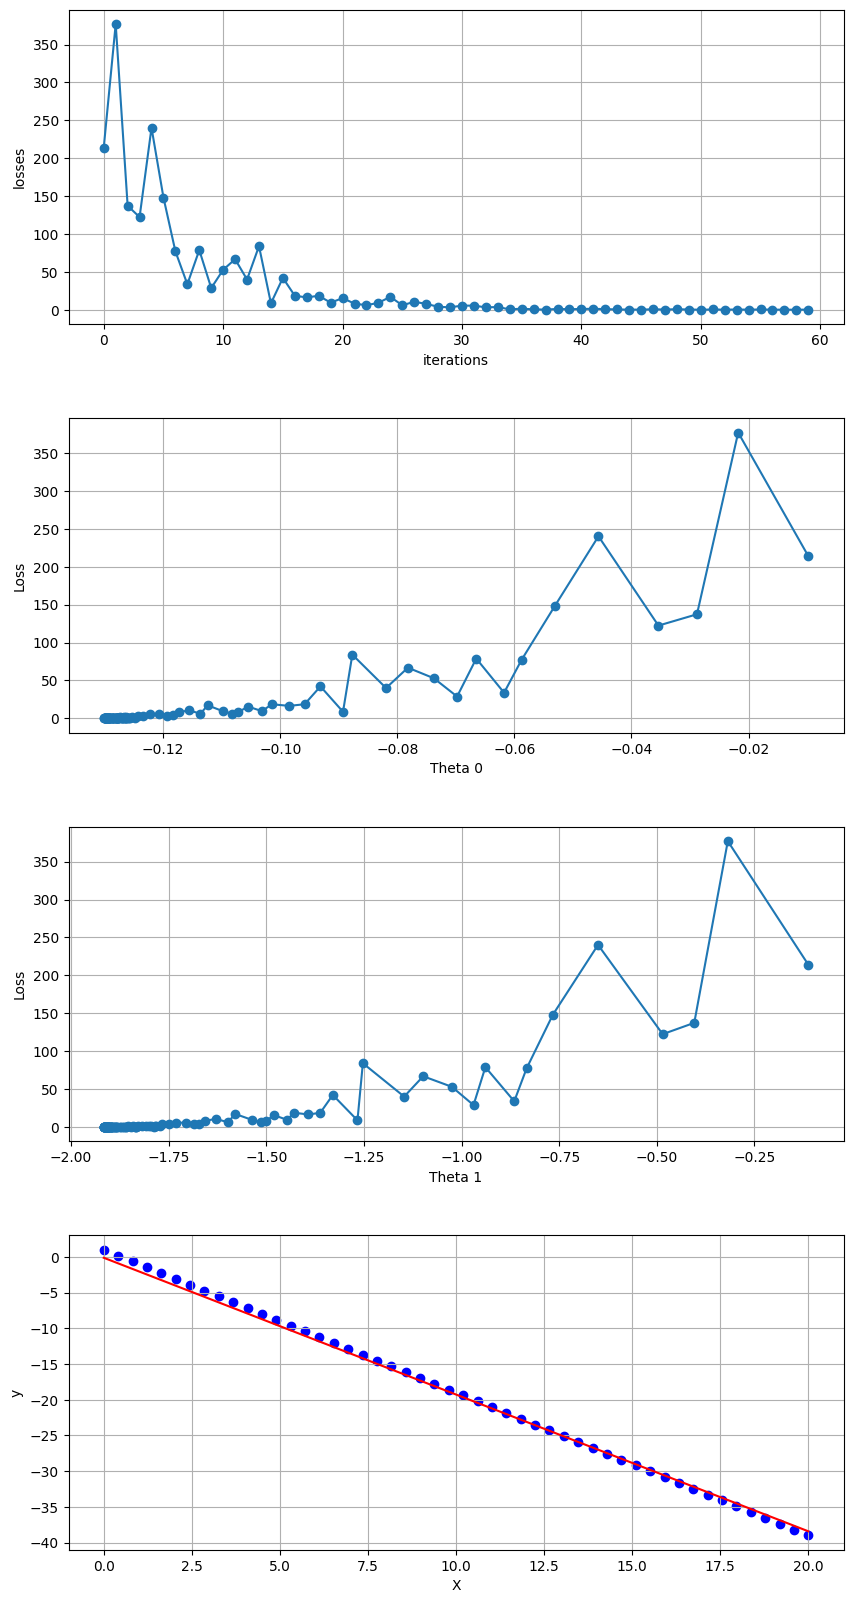

In [264]:
fig , (ax1 , ax2 , ax3  , ax4) = plt.subplots(4 , 1 , figsize=(10,20))
ax1.plot(total_cost_batched[:60] , marker = "o")
ax1.set_xlabel("iterations")
ax1.set_ylabel("losses")
ax1.grid(True)

ax2.plot(theta_history_0 , total_cost_batched , marker = "o" , linestyle='-')
ax2.set_xlabel("Theta 0")
ax2.set_ylabel("Loss")
ax2.grid(True)

ax3.plot(theta_history_1 , total_cost_batched , marker = "o" , linestyle='-')
ax3.set_xlabel("Theta 1")
ax3.set_ylabel("Loss")
ax3.grid(True)

ax4.scatter(X , y , color = "blue")
ax4.plot(X , theta_0 + theta_1*X , color = "red")
ax4.set_xlabel("X")
ax4.set_ylabel("y")
ax4.grid(True)

plt.subplots_adjust(hspace=0.3)
plt.show()

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

In [265]:
theta_history_0 , theta_history_1 , total_cost_batched , theta_0 , theta_1 = mini_batch_GD(X , y , 0.0005 , 300 , 10)

Epoch 1
Cost 123.67834609671513
gradient Norm 144.89281876537092
gradients:
[[ 11.3640554]
 [144.4464855]]
Theta:
[[-0.04124848]
 [-0.56830871]]

Epoch 2
Cost 61.3760080577444
gradient Norm 111.67270774634335
gradients:
[[  9.50946615]
 [111.26708277]]
Theta:
[[-0.06980463]
 [-0.96708042]]

Epoch 3
Cost 30.4633268252524
gradient Norm 80.93025589076039
gradients:
[[ 6.18781338]
 [80.69335341]]
Theta:
[[-0.09004182]
 [-1.248206  ]]

Epoch 4
Cost 15.146660649755274
gradient Norm 48.83976842021514
gradients:
[[ 3.31021219]
 [48.7274612 ]]
Theta:
[[-0.10382555]
 [-1.44627082]]

Epoch 5
Cost 7.578986979214029
gradient Norm 58.89759972485592
gradients:
[[ 3.65425608]
 [58.78412767]]
Theta:
[[-0.11343799]
 [-1.58542347]]

Epoch 6
Cost 3.834493942423056
gradient Norm 22.5702059428363
gradients:
[[ 1.5177094 ]
 [22.51911975]]
Theta:
[[-0.11997268]
 [-1.68331733]]

Epoch 7
Cost 1.9848801739265403
gradient Norm 28.158729533465294
gradients:
[[ 1.7105107 ]
 [28.10672877]]
Theta:
[[-0.12435148]
 [-1

In [266]:
r2 = r2_score(y , theta_0 + theta_1 *X)
r2

0.997625536760992

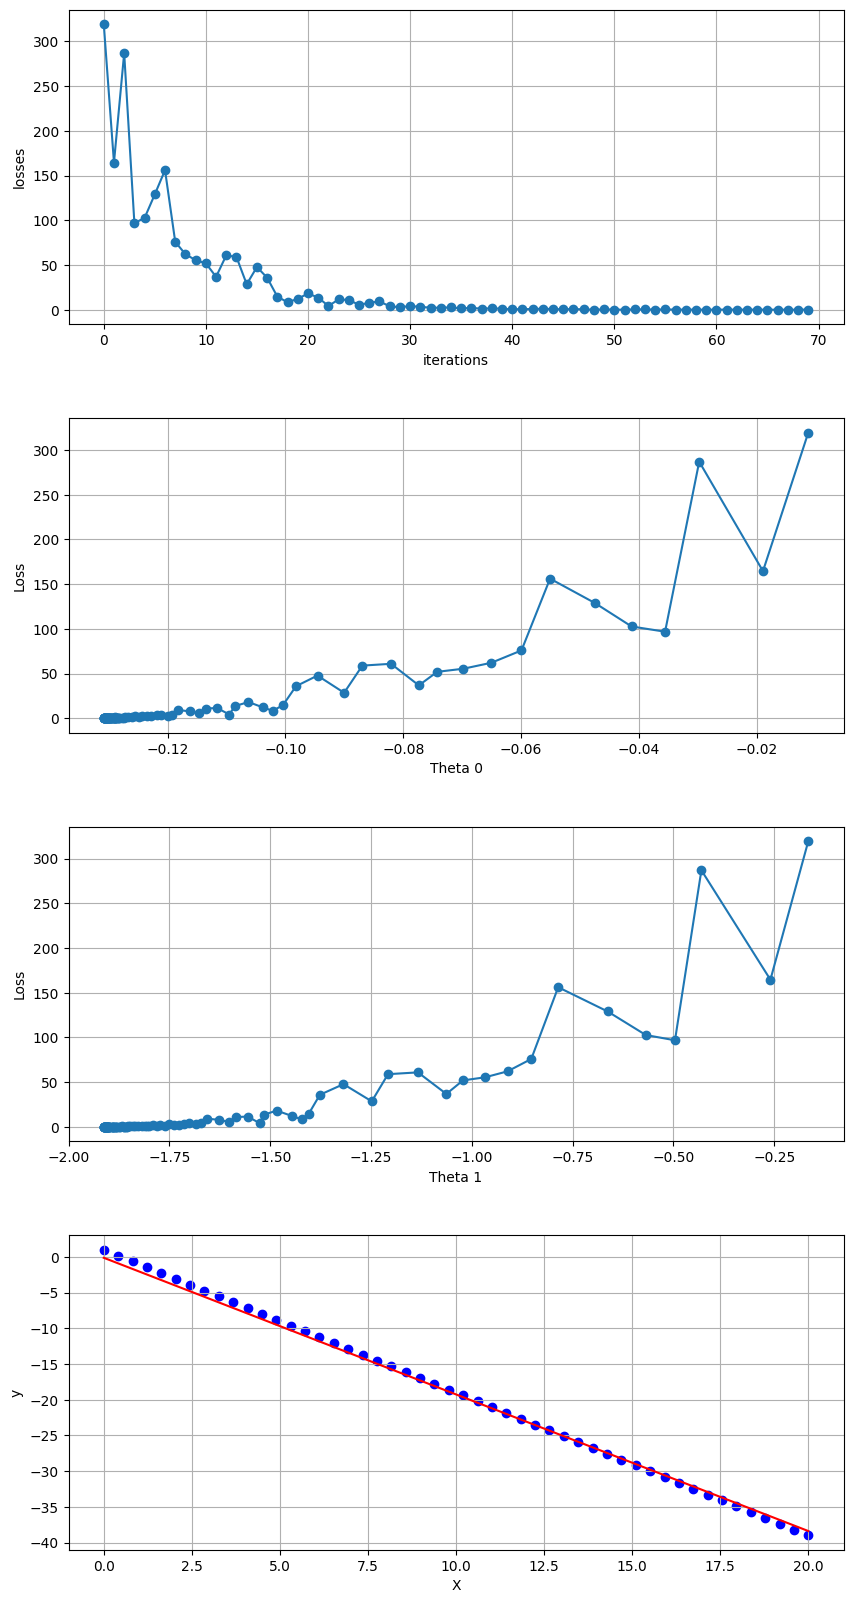

In [267]:
fig , (ax1 , ax2 , ax3  , ax4) = plt.subplots(4 , 1 , figsize=(10,20))
ax1.plot(total_cost_batched[:70] , marker = "o")
ax1.set_xlabel("iterations")
ax1.set_ylabel("losses")
ax1.grid(True)

ax2.plot(theta_history_0 , total_cost_batched , marker = "o" , linestyle='-')
ax2.set_xlabel("Theta 0")
ax2.set_ylabel("Loss")
ax2.grid(True)

ax3.plot(theta_history_1 , total_cost_batched , marker = "o" , linestyle='-')
ax3.set_xlabel("Theta 1")
ax3.set_ylabel("Loss")
ax3.grid(True)

ax4.scatter(X , y , color = "blue")
ax4.plot(X , theta_0 + theta_1*X , color = "red")
ax4.set_xlabel("X")
ax4.set_ylabel("y")
ax4.grid(True)

plt.subplots_adjust(hspace=0.3)
plt.show()

##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.

In [268]:
theta_history_0 , theta_history_1 , total_cost_batched , theta_0 , theta_1 = mini_batch_GD(X , y , 0.0005 , 300 , 20)

Epoch 1
Cost 167.04386034756863
gradient Norm 168.55658547236843
gradients:
[[ 13.28117888]
 [168.03253493]]
Theta:
[[-0.02580691]
 [-0.34956846]]

Epoch 2
Cost 111.10848874276844
gradient Norm 150.93648039205237
gradients:
[[ 12.91443936]
 [150.38297234]]
Theta:
[[-0.04724141]
 [-0.63862436]]

Epoch 3
Cost 73.76371450106434
gradient Norm 126.60298406969383
gradients:
[[  9.84747639]
 [126.21942317]]
Theta:
[[-0.06461229]
 [-0.87544064]]

Epoch 4
Cost 49.33873281744241
gradient Norm 88.78719370330107
gradients:
[[ 6.39697946]
 [88.55644765]]
Theta:
[[-0.07821896]
 [-1.06532636]]

Epoch 5
Cost 31.982290803716744
gradient Norm 120.56914625942841
gradients:
[[  7.80818633]
 [120.31604738]]
Theta:
[[-0.08993549]
 [-1.23160922]]

Epoch 6
Cost 21.500206124331058
gradient Norm 55.977854759797154
gradients:
[[ 4.31043395]
 [55.81165096]]
Theta:
[[-0.09881316]
 [-1.35545023]]

Epoch 7
Cost 14.019461113898556
gradient Norm 76.41966358838486
gradients:
[[ 5.10416137]
 [76.24901652]]
Theta:
[[-0.1

In [269]:
r2 = r2_score(y , theta_0 + theta_1*X)
r2

0.9976222624147116

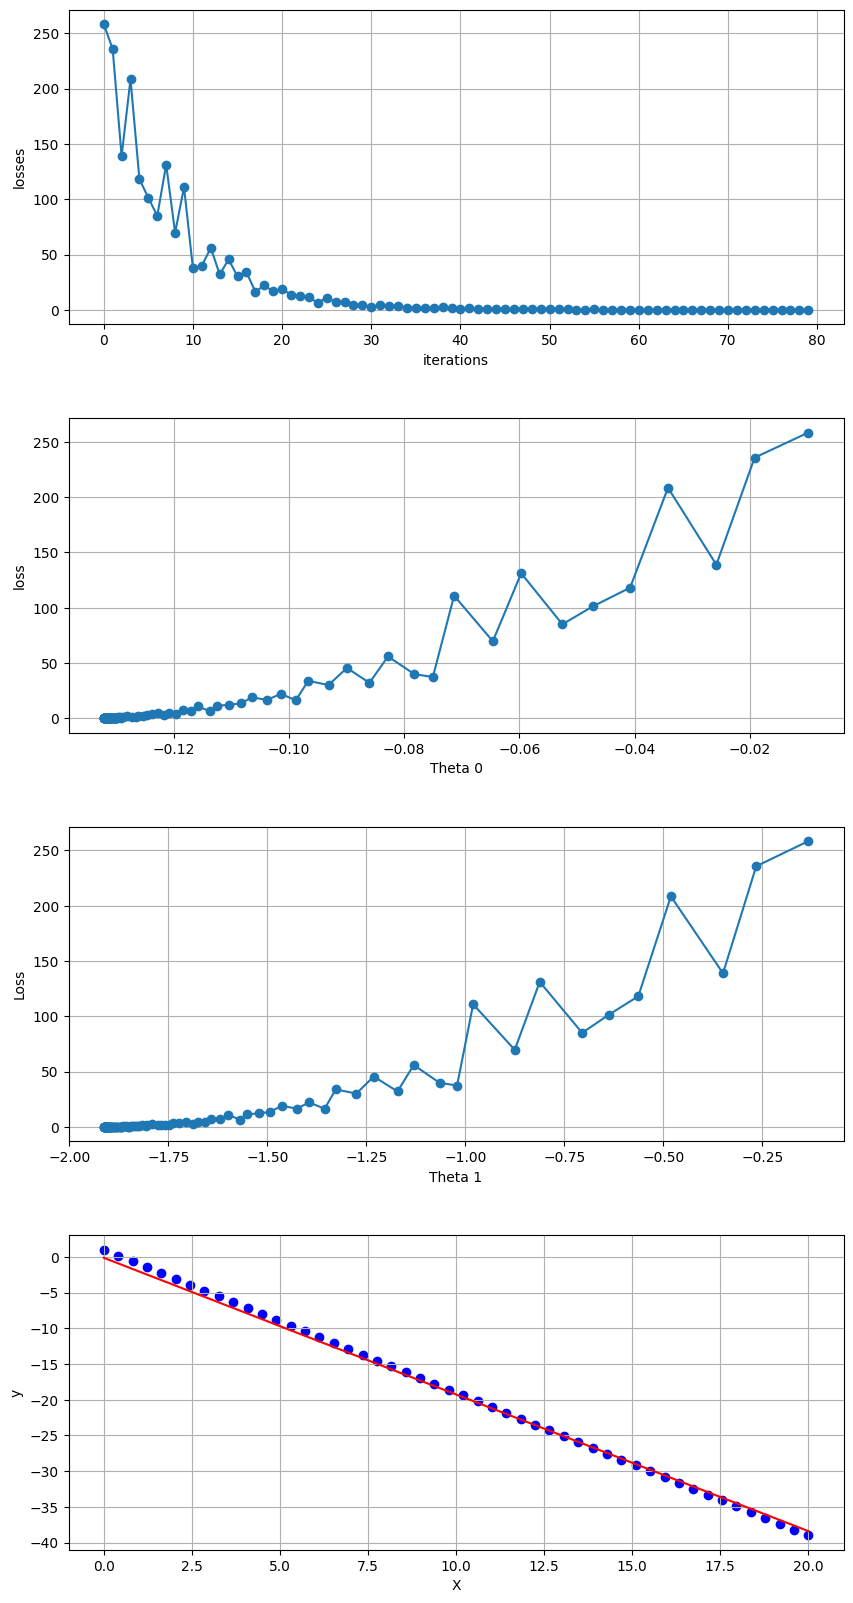

In [270]:
fig , (ax1 , ax2 , ax3  , ax4) = plt.subplots(4 , 1 , figsize=(10,20))

ax1.plot(total_cost_batched[:80] , marker = "o")
ax1.set_xlabel("iterations")
ax1.set_ylabel("losses")
ax1.grid(True)

ax2.plot(theta_history_0 , total_cost_batched , marker = "o" , linestyle='-')
ax2.set_xlabel("Theta 0")
ax2.set_ylabel("loss")
ax2.grid(True)

ax3.plot(theta_history_1 , total_cost_batched , marker = "o" , linestyle='-')
ax3.set_xlabel("Theta 1")
ax3.set_ylabel("Loss")
ax3.grid(True)

ax4.scatter(X , y , color = "blue")
ax4.plot(X , theta_0 + theta_1*X , color = "red")
ax4.set_xlabel("X")
ax4.set_ylabel("y")
ax4.grid(True)

plt.subplots_adjust(hspace=0.3)
plt.show()